In [83]:
#importing pandas to read in the CSV file 
import pandas as pd
df = pd.read_csv('/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head() #shows us what we are working with 


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [84]:
df[['order_amount','total_items']].describe()


,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


In [85]:
# This is strange, the above mean count for order_amount is too high and we can see the standard deviation being too high too. 
# it looks like there are high order_amounts of values like 704000 in a relatively small sample of orders (5000)
# are skewing the AOV(mean), let's see if there are any users ordering high amounts 
orders = df.groupby('user_id')['order_id'].size()
orders.sort_values(ascending = False)

user_id
718    28
868    27
791    26
847    26
727    25
       ..
998     9
812     9
902     9
717     7
750     7
Name: order_id, Length: 301, dtype: int64

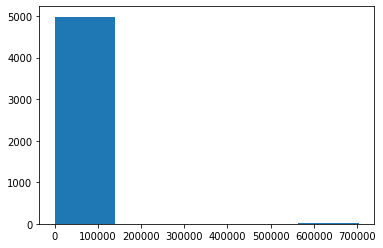

In [86]:
# It looks like there are several users that have more bought more than 20 times from the store, but this is quite a realistic amount so I'm deeming 
# it as irrelevant, let's look at all the order_amounts values in a graph 
import matplotlib.pyplot as plt
plt.hist(df['order_amount'], bins = 5)
plt.show()

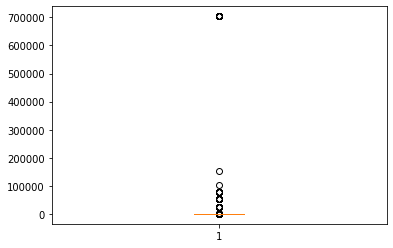

In [87]:
plt.boxplot(df['order_amount'])
plt.show()

In [90]:
#this are several outliers! there is a high outlier at with order total of 70000 and a medium outliers above 10,000. It seems like we misrepresented
# the amount of orders from a shop or the price of an average shoe(it can be a high-end , high priced shoe)
df[['order_amount','total_items','payment_method','user_id','shop_id','created_at']].sort_values(by= 'order_amount',ascending = False).head(30)
# lets look at the highest order amounts

,order_amount,total_items,payment_method,user_id,shop_id,created_at
2153,704000,2000,credit_card,607,42,2017-03-12 4:00:00
3332,704000,2000,credit_card,607,42,2017-03-24 4:00:00
520,704000,2000,credit_card,607,42,2017-03-02 4:00:00
1602,704000,2000,credit_card,607,42,2017-03-17 4:00:00
60,704000,2000,credit_card,607,42,2017-03-04 4:00:00
2835,704000,2000,credit_card,607,42,2017-03-28 4:00:00
4646,704000,2000,credit_card,607,42,2017-03-02 4:00:00
2297,704000,2000,credit_card,607,42,2017-03-07 4:00:00
1436,704000,2000,credit_card,607,42,2017-03-11 4:00:00
4882,704000,2000,credit_card,607,42,2017-03-25 4:00:00


In [ ]:
# Aha! it looks like there are bulk orders from the shop_id 42 and it's purchased by the same user at 4 am!! This could be fradulent behaviour! as
# it's also bought all from credit cards. Someone could be bulk buying using bot and this is skewing our numbers. The next highest order payment 
# is from shop_id 78 only, since not a lot of items are being brought lets check the price per shoe

In [92]:
# lets add a column to find the price per shoe sold from each shop 
df['price_per_shoe'] = df['order_amount']/df['total_items']
df.sort_values(by = 'price_per_shoe', ascending = False ).head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,25725.0
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05,25725.0
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46,25725.0
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43,25725.0


**What metric would you report for this dataset?**

In [93]:
# since each shoe/ item in the shop is about 25725 this shop is charging more than our estimated mean so that is why the AOV is high 
# and also there are bulk orders from shop 42 of more than 70,000 items which also increase our AOV, after correcting our values I would most likely 
# use our median and mean as our metrics 

# I am going to use winsorized estimators to change the price per shoe amount and the total_items bought for the our outliers 

from scipy.stats.mstats import winsorize
df['price_per_shoe'] = winsorize(df['price_per_shoe'],limits = [0.05,0.05])
df['total_items'] = winsorize(df['total_items'],limits = [0.05,0.05])
df['order_amount'] = df['total_items'] * df['price_per_shoe']
df.sort_values(by = 'price_per_shoe', ascending = False ).head()
# this changes our changes our price_per_shoe and total_items to an average amount within the standard deviation 


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
3332,3333,42,607,780.0,4,credit_card,2017-03-24 4:00:00,195.0
4311,4312,78,960,390.0,2,debit,2017-03-01 3:02:10,195.0
1049,1050,12,708,390.0,2,debit,2017-03-01 1:11:03,195.0
1055,1056,99,783,195.0,1,debit,2017-03-14 14:12:02,195.0
1056,1057,78,800,195.0,1,debit,2017-03-15 10:16:45,195.0


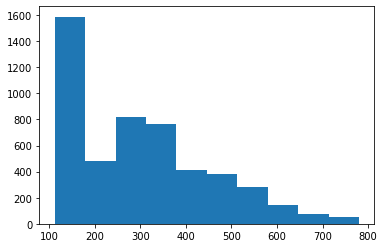

In [94]:
x = plt.hist(df['order_amount'],bins = 10)
plt.show()
# Our graph is more spreadout now!

In [76]:
df[['order_amount','total_items']].describe()
# Even though the outliers have been addressed I would still report the metiric for the median and mean where mean now is 300.655 dollars 
# and median is 284 dollars!

,order_amount,total_items
count,5000.000000,5000.000000
mean,300.655800,1.981000
std,150.772068,0.933602
min,112.000000,1.000000
25%,163.000000,1.000000
50%,284.000000,2.000000
75%,390.000000,3.000000
max,780.000000,4.000000


##**QS 2**


How many orders were shipped by Speedy Express in total?
```
SELECT COUNT(ShipperName)
FROM Orders , Shippers
WHERE ShipperName = "Speedy Express"
AND Orders.ShipperId = Shippers.ShipperId 
```
##### **output**: 54


What is the last name of the employee with the most orders?
```
SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees e JOIN Orders o ON e.EmployeeID = o.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC   
```
##### **output**: Peacock

What product was ordered the most by customers in Germany?
```
SELECT Products.ProductID, SUM(Quantity) as Quantity ,productName
FROM OrderDetails
JOIN Orders ON Orders.OrderID = OrderDetails.orderID
JOIN Products ON OrderDetails.productID = Products.productID
JOIN Customers ON Customers.CustomerID = Orders.CustomerID
WHERE Country = 'Germany'
GROUP BY Products.productID
ORDER BY Quantity DESC 
```
##### **output**: Most orders is 160 

